<a href="https://colab.research.google.com/github/ibnmikhail48/Heart-Disease-Predictor-Devtown/blob/main/heart_disease_predictor_devtown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Definition : Developing a Heart Disease Predictor using Machine Learning


2. Data: The data used was the one provided from the tutorial, though the original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease
There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

3. Evaluation: Achieving 85 - 98%  accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.
4. Features: This consist of  different information about each of the features in the dataset.
Which are the following:
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the
hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv
hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
target1 or 0
5. Tools to use:
I will use Pandas, NumPy, Matplotlib and Seaborn for data analysis and manipulation and Use Scikit-Learn for Modelling

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ibnmikhail48","key":"dcdfbc63edb4f90b2b77b8c93c422e64"}'}

In [ ]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 46.7MB/s]


In [ ]:
# Import Standard Libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

### Data Wrangling Process

In [ ]:
# Using .head() to check the first five rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Using .tail() to check the last five rows of the dataset
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
# Checking the shape of the dataset
df.shape

(920, 16)

In [ ]:
# Checking the columns in the dataset
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# Checking the number of columns and rows in the dataset. Also those that are numerical and categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Insights. They are 920 rows and 16 columns in the dataset. There are 8 columns that are categorical variables while 8 are numerical variables

In [ ]:
# Using .describe() to check the statistical summary of the dataset
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Checking missing values in the dataset
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


#### Visualizing missing data

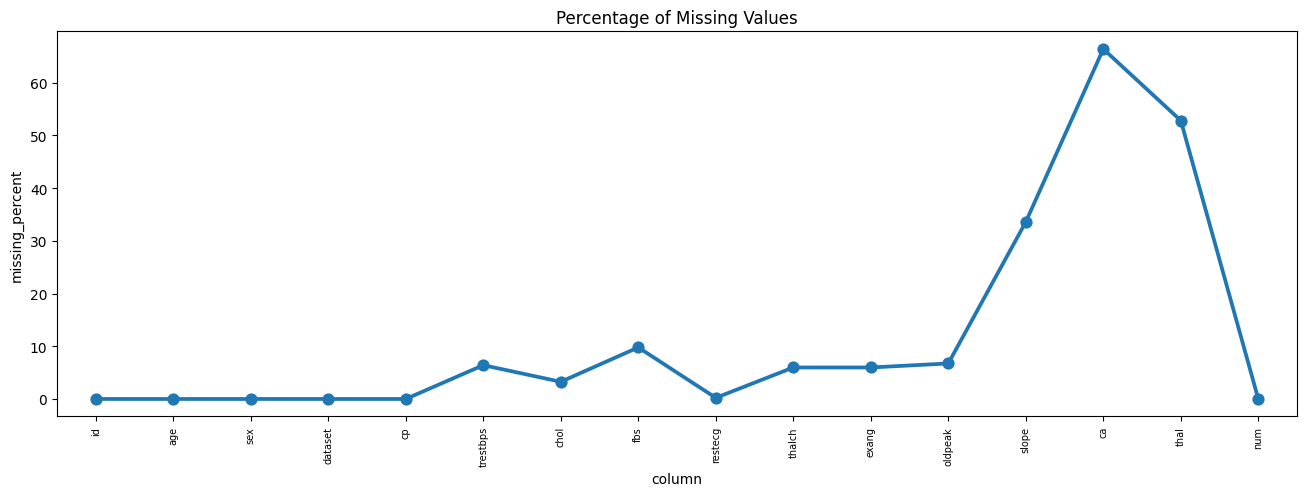

In [ ]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ["column", "missing_percent"]

plt.figure(figsize=(16,5))
sns.pointplot(x="column", y="missing_percent", data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()

***Insight***
The diagram above shows that some columns such as age, sex, dataset have no missng values, while some such as "trestbps" has 10 percent missing values while some such as "ca" and "tbal" has more than 50 percent missing values


#### Checking the correlation that exist between numerical columns

In [ ]:
correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.052924 -0.376936 -0.466427  0.049930   
age       0.239301  1.000000  0.244253 -0.086234 -0.365778  0.258243   
trestbps  0.052924  0.244253  1.000000  0.092853 -0.104899  0.161908   
chol     -0.376936 -0.086234  0.092853  1.000000  0.236121  0.047734   
thalch   -0.466427 -0.365778 -0.104899  0.236121  1.000000 -0.151174   
oldpeak   0.049930  0.258243  0.161908  0.047734 -0.151174  1.000000   
ca        0.061433  0.370416  0.093705  0.051606 -0.264094  0.281817   
num       0.273552  0.339596  0.122291 -0.231547 -0.366265  0.443084   

                ca       num  
id        0.061433  0.273552  
age       0.370416  0.339596  
trestbps  0.093705  0.122291  
chol      0.051606 -0.231547  
thalch   -0.264094 -0.366265  
oldpeak   0.281817  0.443084  
ca        1.000000  0.516216  
num       0.516216  1.000000  


Visualizing the correlation using heatmap

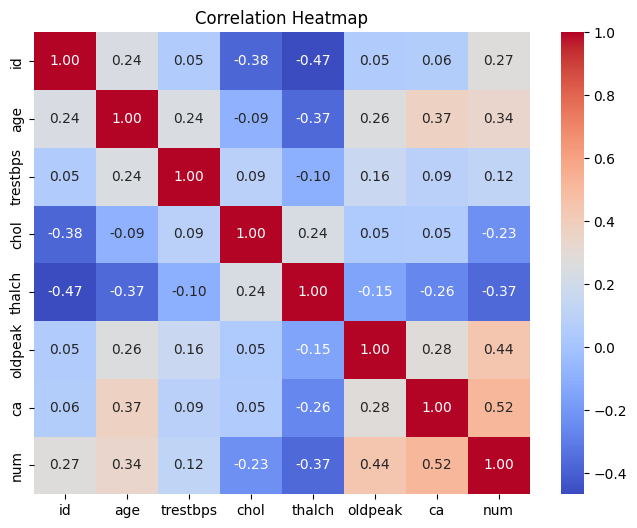

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Imputation


#### Filling up missing data using mean in all numerical columns

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#### Filling up missing data in all categorical columns using mode of the elements in the columns

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0]).astype('object')

/tmp/ipython-input-1413796933.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0]).astype('object')
/tmp/ipython-input-1413796933.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0]).astype('object')


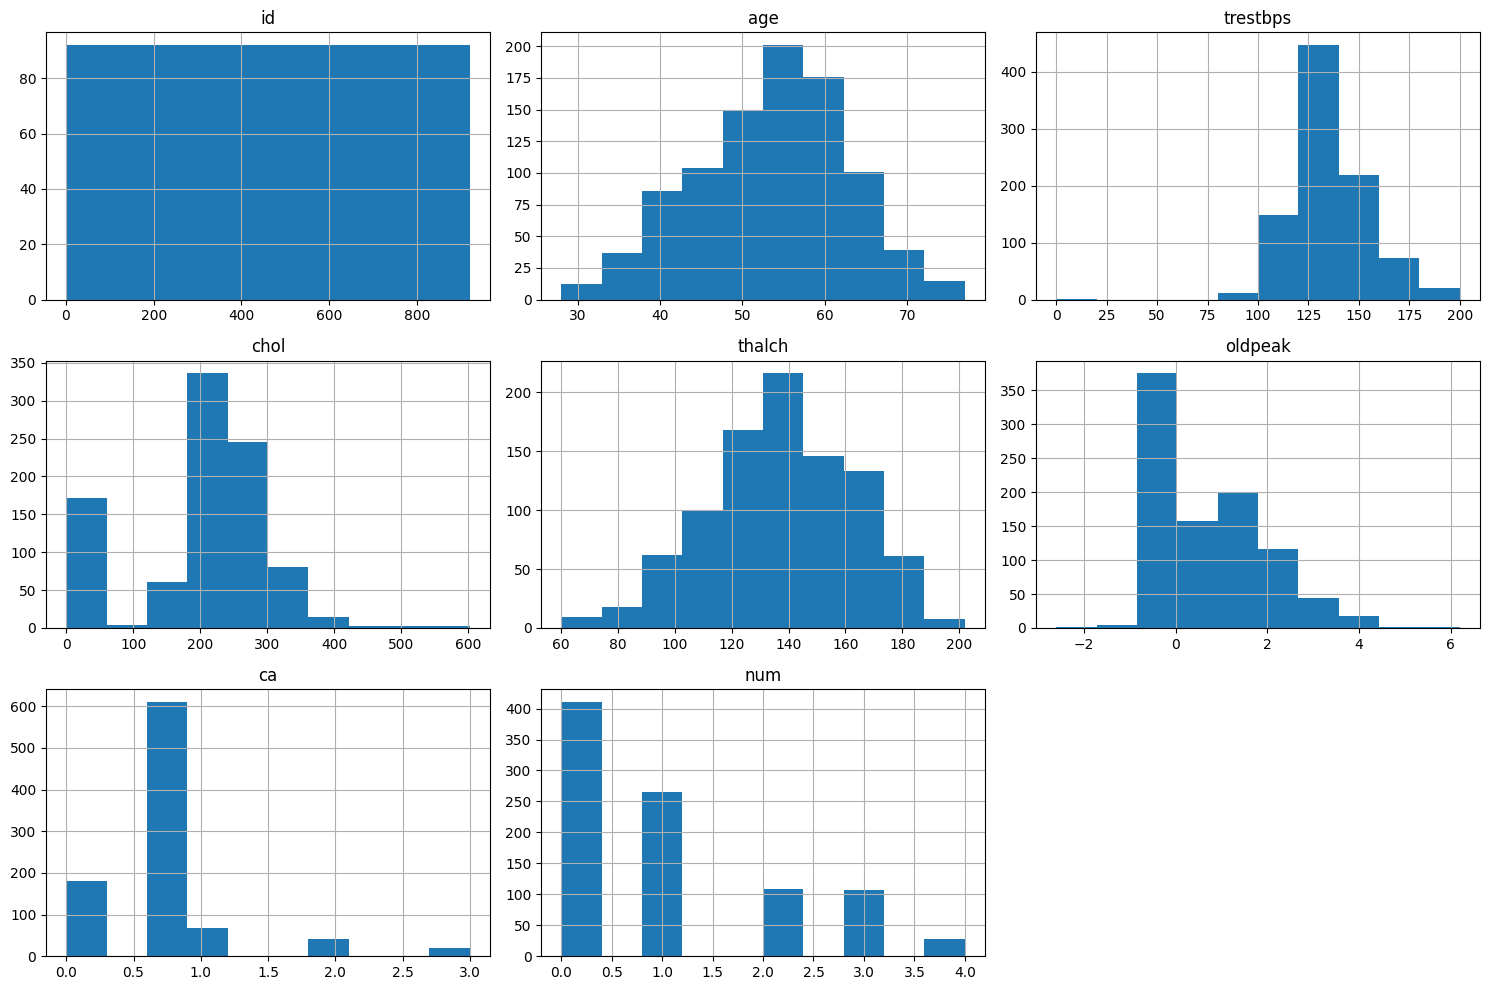

In [ ]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

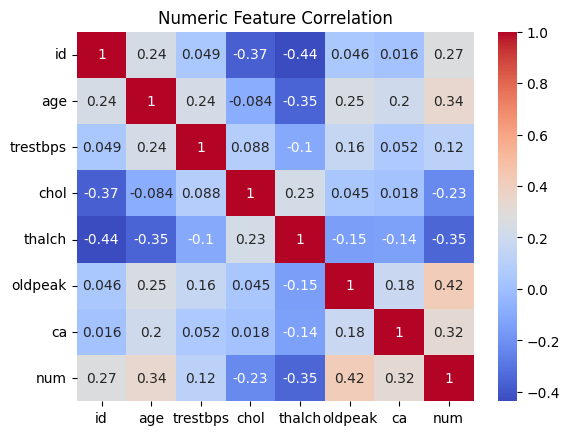

In [ ]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Feature Correlation")
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

# Model Training

##### Import models from Sk-Learn neccessary for modelling and evaluation of the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Setting random state
np.random.seed(42)

# Getting the data ready
X = df.drop('num', axis =1)
y = (df["num"] > 0).astype(int)

Performing Feature Encoding using dummy encoding/OneHotEncoding



In [ ]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Performing Feature scaling on the dataset using the standardization technique. This is done to prevent the model from being biased


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new values = (x -mean) /Standard deviation

Building the Model using LogisticRegression

In [ ]:
# Instantiating the LogisticRegression Model
lr_model = LogisticRegression(solver ="liblinear",max_iter = 1000)
# Fitting the LogisticRegression Model
lr_model.fit(X_train_scaled, y_train)  # Fitting the model

LogisticRegression(max_iter=1000, solver='liblinear')

Evaluating our model beyond accuracy using evaluation metrics such as:

* ROC curve and AUC score
* Confusion matrix
* Classification reports
* Precision
* Recall
* F1-score
using cross-validation where neccesary

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)
# Evaluating Logistic Regression model using accuracy score and classification report
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        75
           1       0.88      0.87      0.88       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Accuracy score = 75 to 98 considered to be good

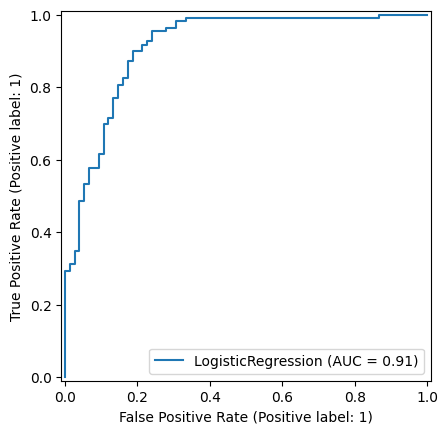

In [ ]:
# Plot ROC curve for LogisticRegression Model
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.show();

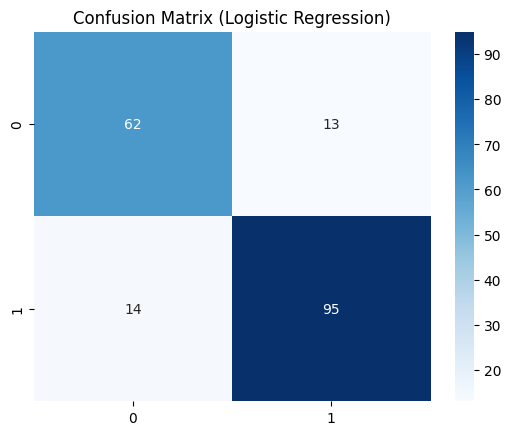

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [ ]:
cv_accuracy = cross_val_score(lr_model, X_train_scaled, y_train, cv = 5)
print(np.mean(cv_accuracy))
cv_precision = cross_val_score(lr_model, X_train_scaled, y_train, cv = 5, scoring = "precision")
print(np.mean(cv_precision))
cv_recall = cross_val_score(lr_model, X_train_scaled, y_train, cv = 5, scoring = "recall")
print(np.mean(cv_recall))
cv_f1_score = cross_val_score(lr_model, X_train_scaled, y_train, cv = 5, scoring = "f1")
print(np.mean(cv_f1_score))

0.8546240117668689
0.8610979270617826
0.875
0.8670464839078222


Building the Model using KNeighborsClassifier()

In [ ]:
# Instantiating the model
knn_model = KNeighborsClassifier()
# Fitting the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Evluating the Model

In [ ]:
y_pred_knn = knn_model.predict(X_test_scaled)
# Evaluating KNeigborsClassifier model using accuracy score and classification report
print("KNeighborsClassifier:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNeighborsClassifier: 0.875
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        75
           1       0.91      0.88      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



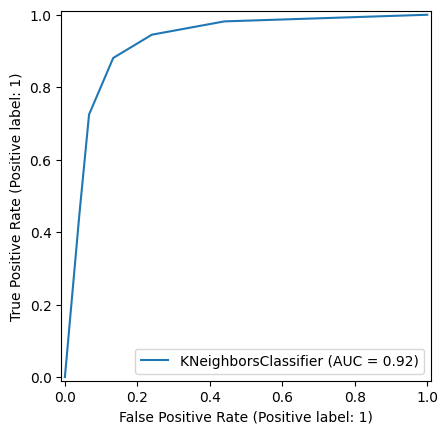

In [ ]:
# Plot ROC curve for kNeighborsClassifier Model
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.show();

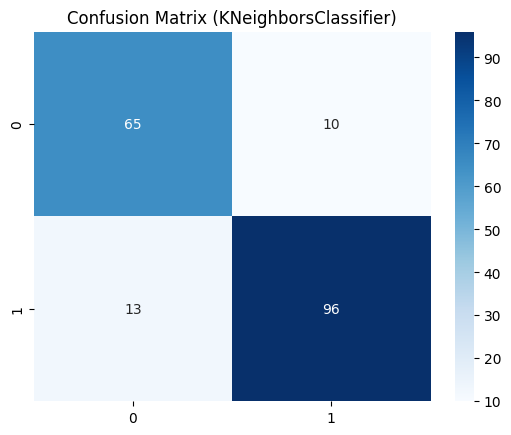

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True, cmap="Blues")
plt.title("Confusion Matrix (KNeighborsClassifier)")
plt.show()

In [ ]:
cv_accuracy = cross_val_score(knn_model, X_train_scaled, y_train, cv = 5)
print(np.mean(cv_accuracy))
cv_precision = cross_val_score(knn_model, X_train_scaled, y_train, cv = 5, scoring = "precision")
print(np.mean(cv_precision))
cv_recall = cross_val_score(knn_model, X_train_scaled, y_train, cv = 5, scoring = "recall")
print(np.mean(cv_recall))
cv_f1_score = cross_val_score(knn_model, X_train_scaled, y_train, cv = 5, scoring = "f1")
print(np.mean(cv_f1_score))

0.8084206655635227
0.81054874691572
0.845
0.8265702136286187


Building the Model using RandomForestClassifier()

Random Forest

In [ ]:
# Instantiating the Model
rf_model = RandomForestClassifier()
# Fitting the RandomForestClassifier
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

Evaluating RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)
# Evaluating RandomForestClassifier model using accuracy score and classification report
print("RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



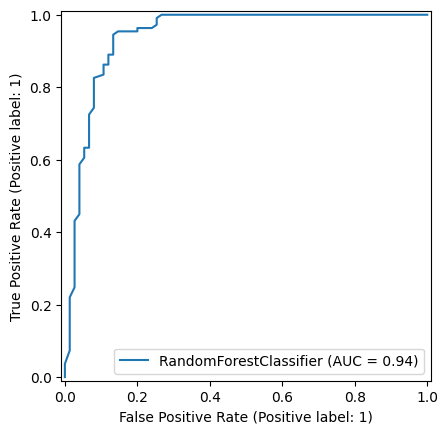

In [ ]:
# Plot ROC curve for RandomForestClassifier Model
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.show();

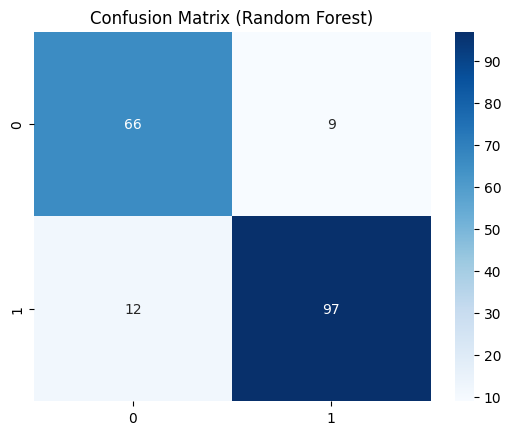

In [ ]:
cm = confusion_matrix( y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
cv_accuracy = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5)
print(np.mean(cv_accuracy))
cv_precision = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5, scoring = "precision")
print(np.mean(cv_precision))
cv_recall = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5, scoring = "recall")
print(np.mean(cv_recall))
cv_f1_score = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5, scoring = "f1")
print(np.mean(cv_f1_score))

0.8817981246552675
0.8764814645649578
0.9
0.8855639139864498


Feature Importance

Feature importance will be done on the RandomForestClassifier Model, because it gives the best prediction out of the three models used

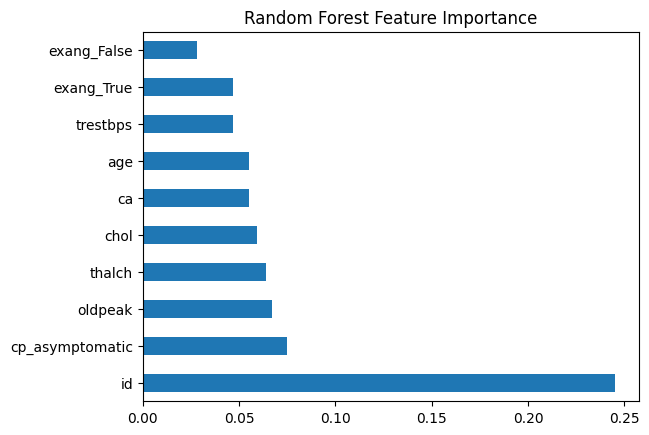

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_, index = X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# JOblib is imported to save the model
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')


['heart_scaler.pkl']

In [ ]:
# Provide a sample input template for users
sample = X.head(1)
sample.to_csv('heart_user_template.csv', index=False)
print("User template saved as 'heart_user_template.csv'")



User template saved as 'heart_user_template.csv'


In [ ]:
from google.colab import files
uploaded = files.upload()  # User uploads their patient data as CSV (same columns as sample template)



Saving heart_disease_uci.csv to heart_disease_uci.csv


In [ ]:
import joblib
import pandas as pd

In [ ]:
user_df = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [ ]:
# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

      id  age     sex        dataset               cp    trestbps   chol  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch    exang   oldpeak        slope  \
0     True 